### Importa Librerias

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.Cargar Datos

In [2]:
empleados=pd.read_csv('data/Employee_salaries.csv')

### 2.Explorecion Inicial

In [3]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [4]:
print(f'El datafame tiene {len(empleados)} registros y tiene la siguientes columnas {empleados.columns}')

El datafame tiene 10291 registros y tiene la siguientes columnas Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')


### Mostrar los primeros registros

In [5]:
empleados.head(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [6]:
empleados.sample(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
739,CEC,Community Engagement Cluster,CEC 16 Community Partnerships,M,84218.44,0.00,0.00,N23
1180,COR,Correction and Rehabilitation,COR 42 DS MCCF Unit 3 Security,M,58263.00,51204.03,0.00,C4
5037,FRS,Fire and Rescue Services,FRS 45 Station 8,M,132119.00,23386.03,9253.10,B2
7152,LIB,Department of Public Libraries,LIB 71 Brigadier General Charles E. McGee Library,F,34434.72,0.00,0.00,21
5329,HHS,Department of Health and Human Services,HHS 60 Aging & Disability Services Division,F,98228.00,0.00,3517.55,21


### Comprobacion si hay valores faltantes

In [7]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [8]:
empleados.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

3. **Transformación de datos**

In [9]:
empleados['Salario_mensual']=empleados['Base_Salary']/12

In [10]:
empleados.sample()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Salario_mensual
6925,HHS,Department of Health and Human Services,HHS 60 Office of Eligibility and Support Services,F,76404.7307,0.0,0.0,20,6367.060892


- Calcular el promedio de salario por departamento.

In [18]:
empleados["Salario_mensual"] = empleados["Base_Salary"] / 12
promedio_salario = empleados.groupby("Department_Name")["Salario_mensual"].mean()
empleados_mas_de_160_horas = empleados[empleados["Salario_mensual"] > 160]

In [19]:
empleados.sample()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Salario_mensual
1242,COR,Correction and Rehabilitation,COR 42 DS MCDC Custody and Security,F,95927.0,57849.94,1661.14,C5,7993.916667


In [13]:
promedio_salario

Department_Name
Alcohol Beverage Services                                      5404.434987
Board of Appeals Department                                    8706.877244
Board of Elections                                             7126.428071
Community Engagement Cluster                                   6480.344856
Community Use of Public Facilities                             7625.927152
Correction and Rehabilitation                                  7080.015017
County Attorney's Office                                      10806.739197
County Council                                                 8812.880424
Department of Environmental Protection                         8720.372235
Department of Finance                                          9594.153443
Department of General Services                                 7668.492105
Department of Health and Human Services                        7422.027654
Department of Housing and Community Affairs                    8708.815398
Departmen

- Filtrar los empleados que ganan más de $10 000 mensual.

In [26]:
empleados[empleados['Salario_mensual']>10000]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Salario_mensual
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.00,0.0,0.00,M2,14656.083333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.36,0.0,0.00,M3,12134.446667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.00,0.0,0.00,M3,11414.166667
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.15,0.0,9021.82,18,12455.345833
13,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,139407.15,0.0,0.00,M3,11617.262500
...,...,...,...,...,...,...,...,...,...
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.00,0.0,0.00,N32,13233.500000
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.10,0.0,0.00,NaN,17919.341667


4. **Agregación de datos**:

- Calcular el salario total pagado por la empresa en el último mes.

In [20]:
empleados['Salario_mensual'].sum()

77450208.13946667

In [38]:
empleados['Salario_bruto'] = empleados['Salario_mensual']  + empleados['Overtime_Pay'] / 12 + empleados['Longevity_Pay'] / 12

In [39]:
empleados['Salario_bruto'].sum()

85696019.19696666

In [37]:
nomina = empleados['Salario_bruto'].sum()
print(f'La nomina mensual es de {nomina}')

La nomina mensual es de 85696019.19696666


In [41]:
empleados[empleados['Salario_bruto']==empleados['Salario_bruto'].max()]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Salario_mensual,Salario_bruto
4574,FRS,Fire and Rescue Services,FRS 45 Station 25,M,132119.0,223998.01,14123.92,B2,11009.916667,30853.410833


- Encontrar el o los empleado(s) con el salario más alto.

In [21]:
empleados.loc[empleados['Salario_mensual'].idxmax()]

Department                                                  CEX
Department_Name                 Offices of the County Executive
Division           CEX 15 Chief Administrative Officer's Office
Gender                                                        M
Base_Salary                                            292000.0
Overtime_Pay                                                0.0
Longevity_Pay                                               0.0
Grade                                                       EX0
Salario_mensual                                    24333.333333
Name: 821, dtype: object

 - Calcular el total de empleados en cada departamento.

In [22]:
empleados["Department_Name"].value_counts()

Department_Name
Department of Health and Human Services                       1877
Department of Police                                          1794
Fire and Rescue Services                                      1440
Department of Transportation                                  1289
Correction and Rehabilitation                                  513
Alcohol Beverage Services                                      462
Department of Public Libraries                                 427
Department of General Services                                 424
Department of Permitting Services                              243
Department of Recreation                                       193
Sheriff's Office                                               188
Department of Environmental Protection                         185
Department of Technology and Enterprise Business Solutions     159
County Council                                                 131
Department of Finance                         

In [46]:
empleados.groupby("Department_Name")['Department'].count().sort_values(ascending=False)

Department_Name
Department of Health and Human Services                       1877
Department of Police                                          1794
Fire and Rescue Services                                      1440
Department of Transportation                                  1289
Correction and Rehabilitation                                  513
Alcohol Beverage Services                                      462
Department of Public Libraries                                 427
Department of General Services                                 424
Department of Permitting Services                              243
Department of Recreation                                       193
Sheriff's Office                                               188
Department of Environmental Protection                         185
Department of Technology and Enterprise Business Solutions     159
County Council                                                 131
Department of Finance                         

5. **Visualización de resultados**:

- Crear un gráfico de barras que muestre el número de empleados en cada departamento.

<Axes: xlabel='Department_Name'>

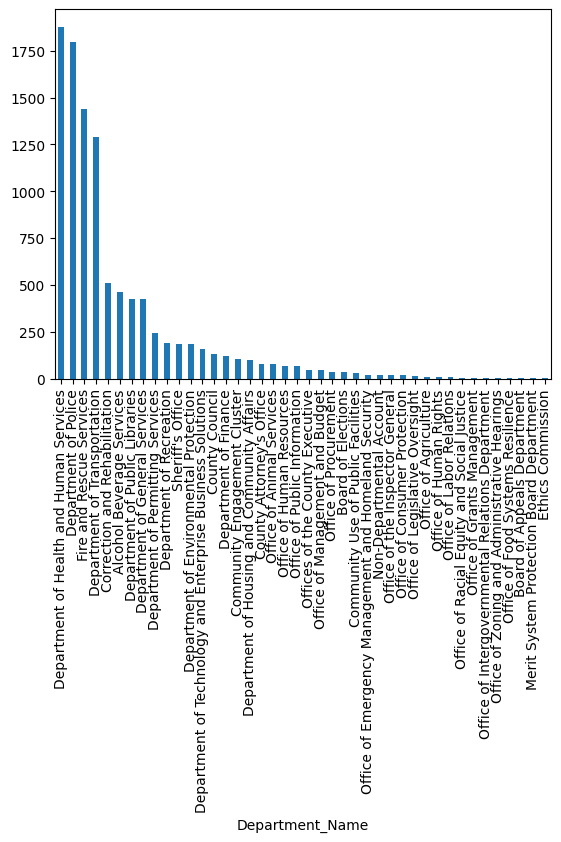

In [23]:
empleados['Department_Name'].value_counts().plot(kind="bar")

Text(0.5, 0, 'Departament_name')

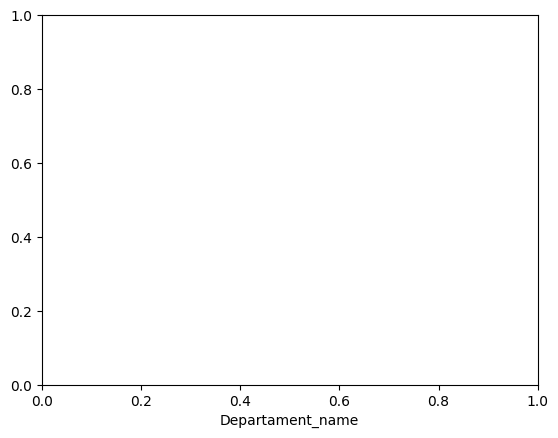

In [24]:
plt.xlabel('Departament_name')

Text(0, 0.5, 'Numero de empleados')

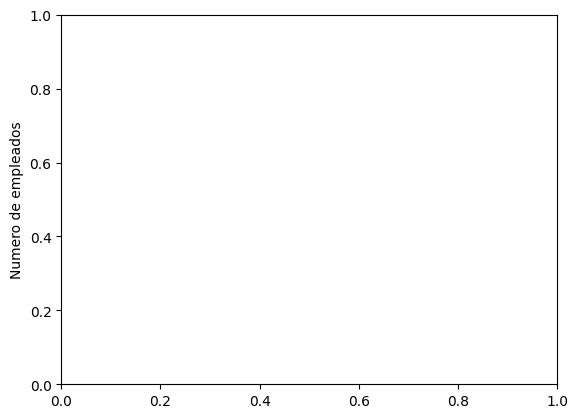

In [25]:
plt.ylabel("Numero de empleados")